# **Tutorial - App Combustível**
---

## Pré-requisitos da aula

- Funções
- Import
- Orientação a Objetos
- Interface Gráfica
- Introdução ao Flet
- Meu primeiro Flet App
- Eventos
- Light e Dark Mode

---

Nas aulas anteriores, criamos alguns apps com a finalidade de apenas testar alguns recursos. A partir de agora, todos os apps que iremos criar podem ser perfeitamente aplicáveis no dia-a-dia do usuário. Finalmente chegamos à fase em que iremos desenvolver nossos apps completos para você poder publicar à vontade e mostrar para os amigos com um aplicativo para chamar de seu.

Nosso primeiro app completo será um app de combustível.

## Situação-problema
---

Imagine que o nosso cliente possua um carro flex, ou seja, aceita como combustível tanto **gasolina** como **etanol**. Não é segredo que o etanol é bem mais barato do que a gasolina. O que muitos podem não saber é que o consumo do etanol também é muito maior. O cliente sabe disso, e gostaria de ter no seu celular um app, ou pelo menos uma aplicação online que pudesse retornar qual combustível tem o melhor custo-benefício com base no preço dos dois.

## Solução
---

Nosso cliente não exigiu que o nosso aplicativo fosse especificamente web ou app para celular. Pediu apenas que fosse um dos dois, mas como o Flet permite que desenvolvamos para qualquer plataforma usando o mesmo código-fonte, não há trabalho algum desenvolver simultâneamente para os dois. É o que faremos:

1. Começe criando o projeto. Faça o nosso ritual padrão de criar a pasta do projeto (nome usado nesse tutorial: "**combustivel**"). Não se esqueça de criar o ambiente virtual `.venv`, instalar o Flet (`pip install flet`) e criar um novo projeto flet dentro da pasta (`flet create .`).
2. Nosso código-fonte inicial se parecerá com esse:

In [ ]:
import flet as ft

def main(page: ft.Page):
    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

3. Acresccente as prorpiedades que desejar:

In [ ]:
import flet as ft

def main(page: ft.Page):
    # propriedades da página
    page.title = "Combustível"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

### AppBar

4. Vamos começar com o **AppBar**. O AppBar é uma barra superior da nossa aplicação que será inserida antes de `page.add()`:

In [ ]:
import flet as ft

def main(page: ft.Page):
    page.title = "Combustível"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar()

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

5. Isso já é o suficiente para gerar um AppBar, embora sem conteúdo. Veja o resultado na versão desktop, mas procure executar também na versão web e mobile:

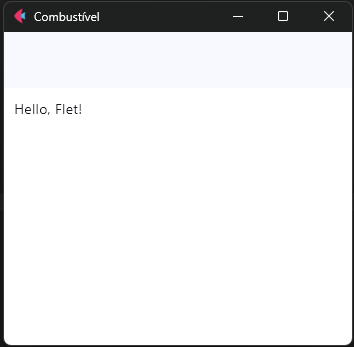

6. Vamos começar colocando um título para o nosso AppBar:

In [ ]:
import flet as ft

def main(page: ft.Page):
    page.title = "Combustível"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16))

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

7. Aproveitaremos que criamos na aula passada um algoritmo para alternar os temas Light e Dark. Vamos implementar esse código dentro do AppBar, com uma alteração: iremos trocar o texto "**Light theme**" e "**Dark theme**" do app da aula anterior por ícones representando os temas. Para isso, iremos criar uma variável representando o ícone do tema padrão da aplicação (que é o tema claro).
8. Depois, iremos programar uma condicional para essa variável para que o ícone mude quando o *switch button* for acionado.
9. Enfim, chamaremos essa variável desta vez dentro do **AppBar** ao invés do SafeBar, acrescentando ao final de `ft.AppBar()` o parâmetro `actions=[tema, interruptor]`, onde `tema` representa o ícone do tema, e `interruptor` representa o *switch button*:

In [ ]:
import flet as ft

def main(page: ft.Page):
    # função do tema
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        # altera o ícone do tema
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Combustível"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    # ícone e botão do tema
    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    # AppBar
    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16), actions=[tema, interruptor])

    page.add(ft.SafeArea(ft.Text("Hello, Flet!")))

ft.app(main)

10. Vamos ver como o nosso app está ficando. Para fins práticos, será mostrado abaixo apenas a tela do app no Desktop, mas procure executar também o seu app nas versões Web e Mobile:

### Light Mode:

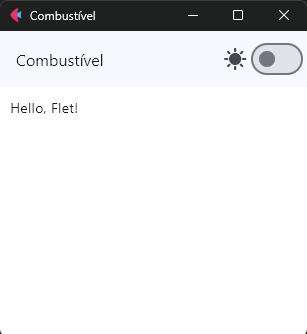

### Dark Mode:

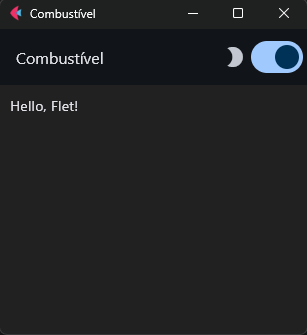

11. Legal! Agora, vamos começar a construção do app em si.

### Adicionando controles de página e manipulando eventos

12. Para o nosso app, precisaremos desses controles:

- `Text`: exibe o resultado na tela.
- `TextField`: controle de entrada usado para receber os valores dos combustíveis.
- `ElevatedButton`: Botão "Calcular" enviará os valores para a função, que retornará o resultado.
- `Row`: um container para exibir TextField e ElevatedButton horizontalmente.

13. Vamos substituir o conteúdo do `ft.Text()`dentro de `ft.SafeArea()` por um texto que funcionará como um título na página do App:

In [ ]:
import flet as ft

def main(page: ft.Page):
    def mudar_tema(e):
        page.theme_mode = (
            ft.ThemeMode.DARK
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.ThemeMode.LIGHT
        )
        page.bgcolor = (
            ft.colors.WHITE
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.colors.GREY_900
        )
        tema.name = (
            ft.icons.SUNNY
            if page.theme_mode == ft.ThemeMode.LIGHT
            else ft.icons.MODE_NIGHT
        )
        page.update()

    page.title = "Combustível"
    page.theme_mode = ft.ThemeMode.LIGHT
    page.bgcolor = ft.colors.WHITE

    tema = ft.Icon(name=ft.icons.SUNNY)
    interruptor = ft.Switch(on_change=mudar_tema)

    page.appbar = ft.AppBar(title=ft.Text("Combustível", size=16), actions=[tema, interruptor])

    page.add(ft.SafeArea(ft.Row([ft.Text("\nCusto-benefício combustível", size=25, weight="bold")], alignment=ft.MainAxisAlignment.CENTER)))

ft.app(main)